In [52]:
pip install category_encoders

     |████████████████████████████████| 82 kB 350 kB/s 


In [53]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#importing the required datasets into colab
from google.colab import files
uploaded = files.upload()

Saving Train_Set.csv to Train_Set.csv


In [4]:
df_train = pd.read_csv('Train_Set.csv')
df_train.head()

,OrderId,Customer_Id,Customer_Category,Cust_State,Zipcode,Sales,Order_zone,Price,CategoryName,Transcation,Dept_Id,Dept_Name,Profit_Ratio,Discount,Quantity,Order_Profit,Product_type,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Shipping_Class,Scheduled_Shipping,Warehouse_Region,Delivery_Review,Session_Ordered,WeekdayOrder,Delivery_Status
0,2477882,12386,Consumer,AR,19120,150.0,Central,4383.39,Cat-2,UPI,4,Apparel,0.08,0.10,3,352.78,Fragile,17,191.0,1592.0,0,Standard,4,NORTH,5.0,2.0,0,0
1,2477895,2630,Consumer,BR,2907,165.0,East,4295.72,Cat-2,UPI,4,Apparel,0.47,0.16,3,2018.10,Fragile,17,79.0,1420.0,0,Standard,6,NORTH,2.0,2.0,1,0
2,2473260,1752,Corporate,RJ,90214,171.0,South,3616.65,Cat-50,Cash,7,Fan Shop,0.26,0.07,4,939.63,Not Fragile,46,67.0,1231.0,0,Standard,6,SOUTH,4.0,2.0,0,1
3,2466916,9268,Consumer,UP,745,132.0,East,9175.86,Cat-12,Credit,4,Apparel,0.48,0.18,1,4401.74,Not Fragile,18,45.0,NaN,1,2A,4,NORTH,4.0,3.0,1,1
4,2351480,2888,Corporate,UP,92427,NaN,North,2779.29,Cat-3,UPI,5,Golf,0.13,0.16,4,361.70,Not Fragile,29,43.0,1018.0,1,Standard,5,CENTRAL,2.0,1.0,0,1


In [5]:
#importing the required datasets (test file) into colab
from google.colab import files
uploaded = files.upload()

Saving Test_Set.csv to Test_Set.csv


In [6]:
df_test = pd.read_csv('Test_Set.csv')
df_test.head()

,OrderId,Customer_Id,Customer_Category,Cust_State,Zipcode,Sales,Order_zone,Price,CategoryName,Transcation,Dept_Id,Dept_Name,Profit_Ratio,Discount,Quantity,Order_Profit,Product_type,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Shipping_Class,Scheduled_Shipping,Warehouse_Region,Delivery_Review,Session_Ordered,WeekdayOrder
0,2372881,2989,others,HR,735,NaN,West,2833.08,Cat-3,UPI,5,Golf,-0.68,0.07,5,-1920.91,Fragile,29,25.0,1720.0,0,Standard,6,NORTH,5.0,2.0,1
1,2445349,5359,Consumer,MA,737,222.0,Central,14133.42,Cat-49,Debit,7,Fan Shop,0.08,0.06,1,1132.14,Fragile,48,29.0,964.0,1,Standard,4,CENTRAL,3.0,3.0,0
2,2441537,4111,Corporate,GJ,91350,149.0,East,3545.31,Cat-50,Credit,7,Fan Shop,0.34,0.06,3,1204.39,Fragile,46,121.0,2994.0,0,Standard,6,WEST,3.0,1.0,1
3,2461867,5377,Consumer,RJ,77860,162.0,North,9234.05,Cat-12,UPI,4,Apparel,0.39,0.03,1,3600.48,Not Fragile,18,156.0,1008.0,0,Standard,5,CENTRAL,3.0,3.0,1
4,2461659,10563,Consumer,WB,47922,115.0,North,9174.76,Cat-12,UPI,4,Apparel,0.50,0.06,1,4586.33,Fragile,18,114.0,1354.0,0,Standard,2,NE,3.0,2.0,1


In [7]:
#check shape of the datasets
print(df_train.shape)
print(df_test.shape)

(126363, 28)
(54156, 27)


In [8]:
#check the info of both datasets
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126363 entries, 0 to 126362
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   OrderId             126363 non-null  int64  
 1   Customer_Id         126363 non-null  int64  
 2   Customer_Category   126363 non-null  object 
 3   Cust_State          126363 non-null  object 
 4   Zipcode             126363 non-null  int64  
 5   Sales               122749 non-null  float64
 6   Order_zone          126363 non-null  object 
 7   Price               126363 non-null  float64
 8   CategoryName        126363 non-null  object 
 9   Transcation         126363 non-null  object 
 10  Dept_Id             126363 non-null  int64  
 11  Dept_Name           126363 non-null  object 
 12  Profit_Ratio        126363 non-null  float64
 13  Discount            121313 non-null  float64
 14  Quantity            126363 non-null  int64  
 15  Order_Profit        126363 non-nul

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54156 entries, 0 to 54155
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OrderId             54156 non-null  int64  
 1   Customer_Id         54156 non-null  int64  
 2   Customer_Category   54156 non-null  object 
 3   Cust_State          54156 non-null  object 
 4   Zipcode             54156 non-null  int64  
 5   Sales               52696 non-null  float64
 6   Order_zone          54156 non-null  object 
 7   Price               54156 non-null  float64
 8   CategoryName        54156 non-null  object 
 9   Transcation         54156 non-null  object 
 10  Dept_Id             54156 non-null  int64  
 11  Dept_Name           54156 non-null  object 
 12  Profit_Ratio        54156 non-null  float64
 13  Discount            51982 non-null  float64
 14  Quantity            54156 non-null  int64  
 15  Order_Profit        54156 non-null  float64
 16  Prod

In [ ]:
#get summary statistics on the train set
df_train.describe()

,OrderId,Customer_Id,Zipcode,Sales,Price,Dept_Id,Profit_Ratio,Discount,Quantity,Order_Profit,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Scheduled_Shipping,Delivery_Review,Session_Ordered,WeekdayOrder,Delivery_Status
count,1.263630e+05,126363.000000,126363.000000,122749.000000,126363.000000,126363.000000,126363.000000,121313.000000,126363.000000,126363.000000,126363.000000,123417.000000,125668.000000,126363.000000,126363.000000,117298.000000,121571.000000,126363.000000,126363.000000
mean,2.431880e+06,6808.571552,35961.067029,196.119952,10064.758724,5.443682,0.124273,0.105450,2.129255,1257.016748,31.863030,95.976178,3747.630431,0.394261,3.727199,3.363843,2.001497,0.497923,0.328031
std,5.212524e+04,4164.592992,37550.046447,121.448700,9923.788862,1.627874,0.467546,0.072329,1.454968,6690.787375,15.652067,55.362442,7619.837283,0.488693,1.497517,0.928320,0.814737,0.499998,0.469498
min,2.341525e+06,103.000000,12.000000,28.000000,617.310000,2.000000,-2.750000,0.000000,1.000000,-271606.420000,2.000000,10.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,2.386692e+06,3375.000000,742.000000,113.000000,3587.760000,4.000000,0.080000,0.040000,1.000000,314.080000,18.000000,51.000000,756.000000,0.000000,3.000000,3.000000,1.000000,0.000000,0.000000
50%,2.432005e+06,6582.000000,19168.000000,173.000000,4415.280000,5.000000,0.280000,0.100000,1.000000,1258.740000,29.000000,84.000000,1640.000000,0.000000,4.000000,3.000000,2.000000,0.000000,0.000000
75%,2.477044e+06,9888.000000,78219.000000,261.000000,14222.400000,7.000000,0.370000,0.160000,3.000000,3119.900000,45.000000,141.000000,2717.000000,1.000000,5.000000,4.000000,3.000000,1.000000,1.000000
max,2.522043e+06,20874.000000,99225.000000,1969.000000,142151.340000,12.000000,0.500000,0.250000,5.000000,68156.670000,76.000000,210.000000,43999.000000,1.000000,6.000000,5.000000,3.000000,1.000000,1.000000


In [ ]:
#get summary statistics on test set
df_test.describe()

,OrderId,Customer_Id,Zipcode,Sales,Price,Dept_Id,Profit_Ratio,Discount,Quantity,Order_Profit,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Scheduled_Shipping,Delivery_Review,Session_Ordered,WeekdayOrder
count,5.415600e+04,54156.000000,54156.000000,52696.000000,54156.000000,54156.000000,54156.000000,51982.000000,54156.000000,54156.000000,54156.000000,52852.000000,53849.000000,54156.000000,54156.000000,50260.000000,52125.000000,54156.000000
mean,2.431560e+06,6784.596499,35875.939730,195.444948,10050.243450,5.442943,0.121224,0.105585,2.123864,1176.239837,31.824433,95.988591,3777.908355,0.393105,3.720825,3.365718,1.995223,0.501274
std,5.207919e+04,4159.045163,37524.909493,121.930117,9915.684627,1.632458,0.474142,0.072426,1.449912,7213.806452,15.612132,55.494076,7659.787731,0.488444,1.495644,0.927619,0.819457,0.500003
min,2.341536e+06,103.000000,613.000000,28.000000,615.430000,2.000000,-2.750000,0.000000,1.000000,-319688.600000,2.000000,10.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.386580e+06,3353.000000,742.000000,112.000000,3586.707500,4.000000,0.080000,0.040000,1.000000,308.595000,18.000000,51.000000,780.000000,0.000000,3.000000,3.000000,1.000000,0.000000
50%,2.431320e+06,6528.000000,19394.000000,173.000000,4715.580000,5.000000,0.280000,0.110000,1.000000,1255.300000,29.000000,84.000000,1654.000000,0.000000,4.000000,3.000000,2.000000,1.000000
75%,2.476613e+06,9893.000000,78221.000000,259.000000,14220.327500,7.000000,0.370000,0.160000,3.000000,3117.552500,45.000000,141.000000,2736.000000,1.000000,5.000000,4.000000,3.000000,1.000000
max,2.522041e+06,20872.000000,99224.000000,1941.000000,142138.050000,12.000000,0.500000,0.250000,5.000000,54010.850000,76.000000,210.000000,43996.000000,1.000000,6.000000,5.000000,3.000000,1.000000


In [ ]:
#check missing values on train data
df_train.isnull().sum()

OrderId                  0
Customer_Id              0
Customer_Category        0
Cust_State               0
Zipcode                  0
Sales                 3614
Order_zone               0
Price                    0
CategoryName             0
Transcation              0
Dept_Id                  0
Dept_Name                0
Profit_Ratio             0
Discount              5050
Quantity                 0
Order_Profit             0
Product_type             0
Prod_Category_Id         0
ProductLength         2946
ProductWeight          695
Dispatched               0
Shipping_Class           0
Scheduled_Shipping       0
Warehouse_Region         0
Delivery_Review       9065
Session_Ordered       4792
WeekdayOrder             0
Delivery_Status          0
dtype: int64

In [ ]:
#check missing values as a percentage of the data
df_train.isnull().sum() / len(df_train)*100

OrderId               0.000000
Customer_Id           0.000000
Customer_Category     0.000000
Cust_State            0.000000
Zipcode               0.000000
Sales                 2.860014
Order_zone            0.000000
Price                 0.000000
CategoryName          0.000000
Transcation           0.000000
Dept_Id               0.000000
Dept_Name             0.000000
Profit_Ratio          0.000000
Discount              3.996423
Quantity              0.000000
Order_Profit          0.000000
Product_type          0.000000
Prod_Category_Id      0.000000
ProductLength         2.331379
ProductWeight         0.550003
Dispatched            0.000000
Shipping_Class        0.000000
Scheduled_Shipping    0.000000
Warehouse_Region      0.000000
Delivery_Review       7.173777
Session_Ordered       3.792249
WeekdayOrder          0.000000
Delivery_Status       0.000000
dtype: float64

In [ ]:
#the columns sales, discount, product length, product weight, delivery review and session ordered have 2.86%, 4%, 2.33%, 0.55%, 7.17% and 3.79% 
#missing values respectively in the train data

In [ ]:
#check missing values on test data
df_test.isnull().sum() / len(df_test)*100

OrderId               0.000000
Customer_Id           0.000000
Customer_Category     0.000000
Cust_State            0.000000
Zipcode               0.000000
Sales                 2.695916
Order_zone            0.000000
Price                 0.000000
CategoryName          0.000000
Transcation           0.000000
Dept_Id               0.000000
Dept_Name             0.000000
Profit_Ratio          0.000000
Discount              4.014329
Quantity              0.000000
Order_Profit          0.000000
Product_type          0.000000
Prod_Category_Id      0.000000
ProductLength         2.407859
ProductWeight         0.566881
Dispatched            0.000000
Shipping_Class        0.000000
Scheduled_Shipping    0.000000
Warehouse_Region      0.000000
Delivery_Review       7.194032
Session_Ordered       3.750277
WeekdayOrder          0.000000
dtype: float64

In [ ]:
#the columns sales, discount, product length, product weight, delivery review and session ordered have 2.69%, 4%, 2.4%, 0.56%, 7.19% and 3.75% 
#missing values respectively in the test data

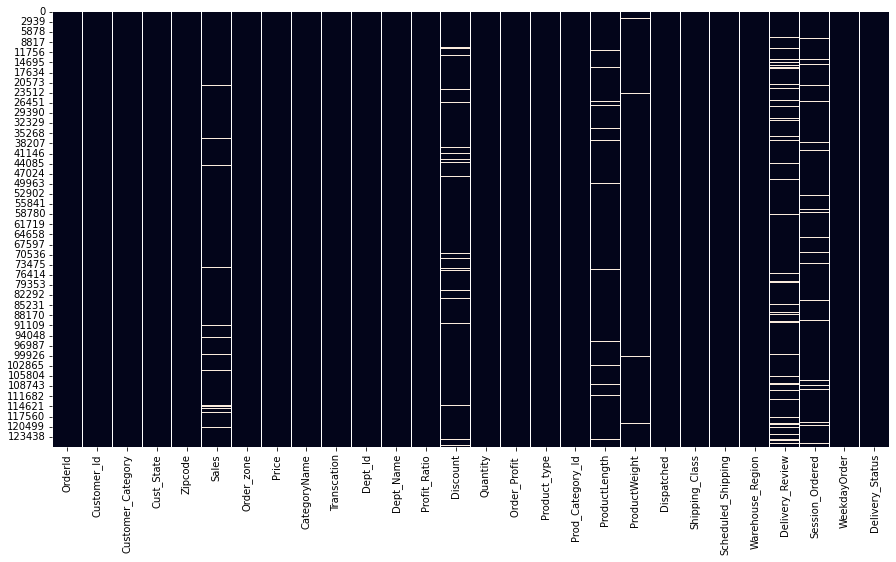

In [ ]:
#visualize missing values using heatmap on both datasets
plt.figure(figsize=(15,8))
sns.heatmap(data=df_train.isnull(), cbar=False)

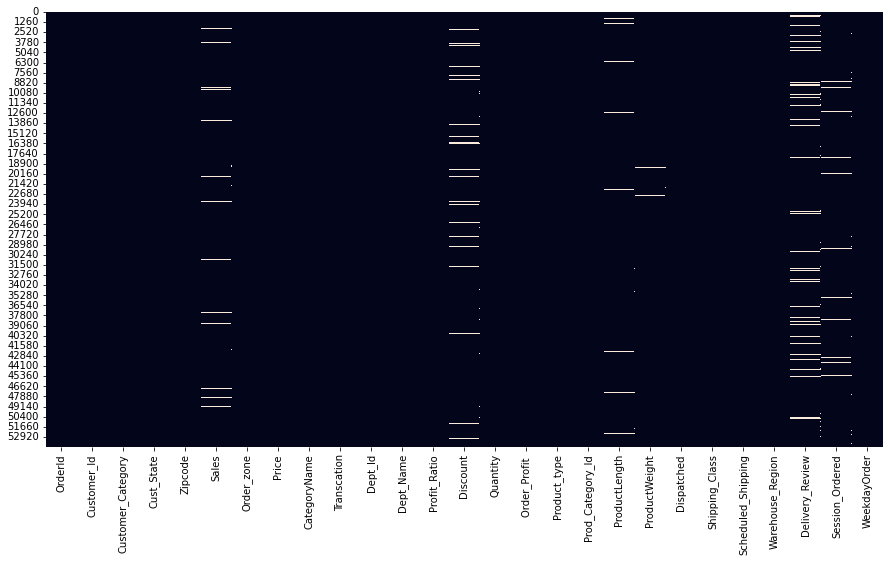

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df_test.isnull(), cbar=False)

The columns having missing values in both the train and test data are the same and the proportion of missing values is also almost equal in both datasets.
We need to impute the missing values in both sets of data by a common method.

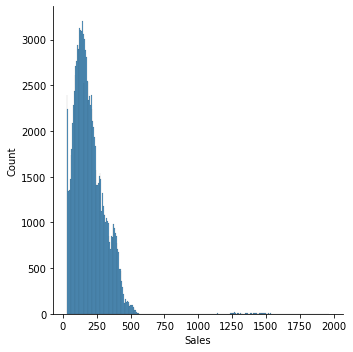

In [ ]:
#check the distribution of the sales column in train data
sns.displot(df_train['Sales'])

In [ ]:
#looking at the distribution plot, sales of around 200 per customer has the highest count

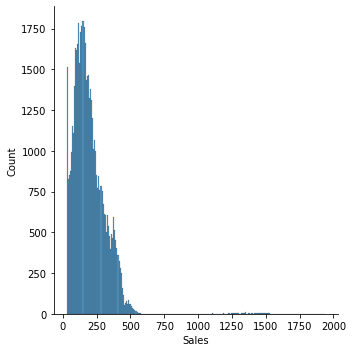

In [ ]:
#check for test data
sns.displot(df_test['Sales'])

In [ ]:
#The distribution is almost same as on the training data

In [ ]:
df_train.describe()['Sales']

count    122749.000000
mean        196.119952
std         121.448700
min          28.000000
25%         113.000000
50%         173.000000
75%         261.000000
max        1969.000000
Name: Sales, dtype: float64

In [ ]:
df_test.describe()['Sales']

count    52696.000000
mean       195.444948
std        121.930117
min         28.000000
25%        112.000000
50%        173.000000
75%        259.000000
max       1941.000000
Name: Sales, dtype: float64

Looking at the summary statistics for the Sales column in both data sets, we have mean and median ranges as 195 and 173 respectively.

In [ ]:
#the mean and median ranges are not very close to each other. Let us impute by the median values

In [10]:
#make copy of train set and impute on this data
df_train_copy = df_train.copy()

In [11]:
#make copy of test set and impute on this data
df_test_copy = df_test.copy()

In [12]:
#use median to impute the missing values on train set
df_train_copy['Sales'] = df_train_copy['Sales'].fillna(df_train_copy['Sales'].median())

In [ ]:
df_train_copy.isnull().sum()

OrderId                  0
Customer_Id              0
Customer_Category        0
Cust_State               0
Zipcode                  0
Sales                    0
Order_zone               0
Price                    0
CategoryName             0
Transcation              0
Dept_Id                  0
Dept_Name                0
Profit_Ratio             0
Discount              5050
Quantity                 0
Order_Profit             0
Product_type             0
Prod_Category_Id         0
ProductLength         2946
ProductWeight          695
Dispatched               0
Shipping_Class           0
Scheduled_Shipping       0
Warehouse_Region         0
Delivery_Review       9065
Session_Ordered       4792
WeekdayOrder             0
Delivery_Status          0
dtype: int64

In [13]:
#use median to impute the missing values on test set
df_test_copy['Sales'] = df_test_copy['Sales'].fillna(df_test_copy['Sales'].median())

In [ ]:
df_test_copy.isnull().sum()

OrderId                  0
Customer_Id              0
Customer_Category        0
Cust_State               0
Zipcode                  0
Sales                    0
Order_zone               0
Price                    0
CategoryName             0
Transcation              0
Dept_Id                  0
Dept_Name                0
Profit_Ratio             0
Discount              2174
Quantity                 0
Order_Profit             0
Product_type             0
Prod_Category_Id         0
ProductLength         1304
ProductWeight          307
Dispatched               0
Shipping_Class           0
Scheduled_Shipping       0
Warehouse_Region         0
Delivery_Review       3896
Session_Ordered       2031
WeekdayOrder             0
dtype: int64

In [ ]:
#check summary statistics for Sales column after imputation
df_train_copy.describe()['Sales']

count    126363.000000
mean        195.458718
std         119.761379
min          28.000000
25%         114.000000
50%         173.000000
75%         257.000000
max        1969.000000
Name: Sales, dtype: float64

In [ ]:
df_test_copy.describe()['Sales']

count    54156.000000
mean       194.839852
std        120.330216
min         28.000000
25%        114.000000
50%        173.000000
75%        255.000000
max       1941.000000
Name: Sales, dtype: float64

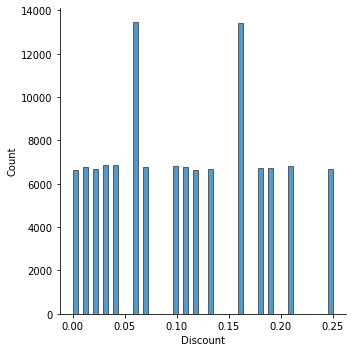

In [ ]:
#check distrbution and summary statistics for discount column on train and test sets
sns.displot(df_train['Discount'])

In [ ]:
df_train.describe()['Discount']

count    121313.000000
mean          0.105450
std           0.072329
min           0.000000
25%           0.040000
50%           0.100000
75%           0.160000
max           0.250000
Name: Discount, dtype: float64

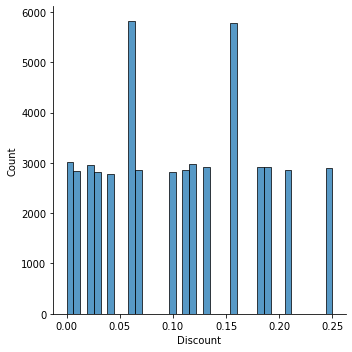

In [ ]:
sns.displot(df_test['Discount'])

In [ ]:
df_test.describe()['Discount']

count    51982.000000
mean         0.105585
std          0.072426
min          0.000000
25%          0.040000
50%          0.110000
75%          0.160000
max          0.250000
Name: Discount, dtype: float64

In [ ]:
df_train['Discount'].value_counts()

0.06    13450
0.16    13411
0.03     6882
0.04     6873
0.21     6798
0.10     6797
0.01     6787
0.07     6762
0.11     6754
0.19     6734
0.18     6733
0.13     6702
0.25     6698
0.02     6668
0.12     6636
0.00     6628
Name: Discount, dtype: int64

In [ ]:
df_test['Discount'].value_counts()

0.06    5819
0.16    5785
0.00    3016
0.12    2987
0.02    2958
0.13    2917
0.18    2910
0.19    2908
0.25    2889
0.11    2866
0.21    2853
0.07    2852
0.01    2833
0.10    2810
0.03    2810
0.04    2769
Name: Discount, dtype: int64

The column Discount is a categorical feature. We will again use the knn imputer for imputing the missing values in this column.

In [14]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_train_copy['Discount'] = imputer.fit_transform(df_train_copy[['Discount']])

In [ ]:
df_train_copy.isnull().sum()

OrderId                  0
Customer_Id              0
Customer_Category        0
Cust_State               0
Zipcode                  0
Sales                    0
Order_zone               0
Price                    0
CategoryName             0
Transcation              0
Dept_Id                  0
Dept_Name                0
Profit_Ratio             0
Discount                 0
Quantity                 0
Order_Profit             0
Product_type             0
Prod_Category_Id         0
ProductLength         2946
ProductWeight          695
Dispatched               0
Shipping_Class           0
Scheduled_Shipping       0
Warehouse_Region         0
Delivery_Review       9065
Session_Ordered       4792
WeekdayOrder             0
Delivery_Status          0
dtype: int64

In [15]:
#impute on test data
df_test_copy['Discount'] = imputer.fit_transform(df_test_copy[['Discount']])

In [ ]:
df_test_copy.isnull().sum()

OrderId                  0
Customer_Id              0
Customer_Category        0
Cust_State               0
Zipcode                  0
Sales                    0
Order_zone               0
Price                    0
CategoryName             0
Transcation              0
Dept_Id                  0
Dept_Name                0
Profit_Ratio             0
Discount                 0
Quantity                 0
Order_Profit             0
Product_type             0
Prod_Category_Id         0
ProductLength         1304
ProductWeight          307
Dispatched               0
Shipping_Class           0
Scheduled_Shipping       0
Warehouse_Region         0
Delivery_Review       3896
Session_Ordered       2031
WeekdayOrder             0
dtype: int64

In [16]:
#check value counts
df_train_copy['Discount'].value_counts()

0.06000    13450
0.16000    13411
0.03000     6882
0.04000     6873
0.21000     6798
0.10000     6797
0.01000     6787
0.07000     6762
0.11000     6754
0.19000     6734
0.18000     6733
0.13000     6702
0.25000     6698
0.02000     6668
0.12000     6636
0.00000     6628
0.10545     5050
Name: Discount, dtype: int64

In [17]:
df_test_copy['Discount'].value_counts()

0.060000    5819
0.160000    5785
0.000000    3016
0.120000    2987
0.020000    2958
0.130000    2917
0.180000    2910
0.190000    2908
0.250000    2889
0.110000    2866
0.210000    2853
0.070000    2852
0.010000    2833
0.100000    2810
0.030000    2810
0.040000    2769
0.105585    2174
Name: Discount, dtype: int64

In [ ]:
#check the summary statistics and distribution for product length
df_train_copy.describe()['ProductLength']

count    123417.000000
mean         95.976178
std          55.362442
min          10.000000
25%          51.000000
50%          84.000000
75%         141.000000
max         210.000000
Name: ProductLength, dtype: float64

In [ ]:
df_test_copy.describe()['ProductLength']

count    52852.000000
mean        95.988591
std         55.494076
min         10.000000
25%         51.000000
50%         84.000000
75%        141.000000
max        210.000000
Name: ProductLength, dtype: float64

In [ ]:
#the mean and median values are not close to each other

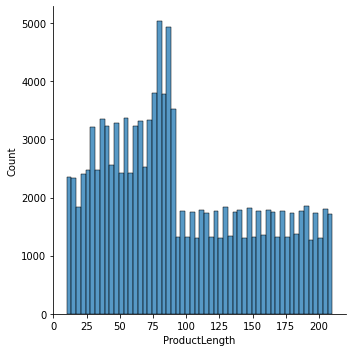

In [ ]:
#check distribution on both sets
sns.displot(df_train_copy['ProductLength'])

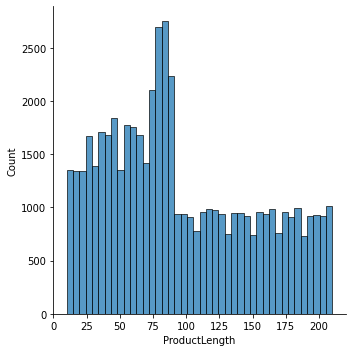

In [ ]:
sns.displot(df_test_copy['ProductLength'])

In [ ]:
#we have almost similar distribution on both data sets. We'll again use the median value to impute the missing values 

In [18]:
#impute missing data on train set
df_train_copy['ProductLength'] = df_train_copy['ProductLength'].fillna(df_train_copy['ProductLength'].median())

In [ ]:
df_train_copy['ProductLength'].isnull().sum()

0

In [19]:
#impute on test data
df_test_copy['ProductLength'] = df_test_copy['ProductLength'].fillna(df_test_copy['ProductLength'].median())

In [ ]:
df_test_copy['ProductLength'].isnull().sum()

0

In [ ]:
#impute missing values in the product weight column as done in the productlength column by median

In [20]:
#impute missing data on train set
df_train_copy['ProductWeight'] = df_train_copy['ProductWeight'].fillna(df_train_copy['ProductWeight'].median())

In [ ]:
df_train_copy['ProductWeight'].isnull().sum()

0

In [21]:
#impute the missing values on the test data
df_test_copy['ProductWeight'] = df_test_copy['ProductWeight'].fillna(df_test_copy['ProductWeight'].median())

In [ ]:
df_test_copy['ProductWeight'].isnull().sum()

0

In [ ]:
df_train_copy.isnull().sum()

OrderId                  0
Customer_Id              0
Customer_Category        0
Cust_State               0
Zipcode                  0
Sales                    0
Order_zone               0
Price                    0
CategoryName             0
Transcation              0
Dept_Id                  0
Dept_Name                0
Profit_Ratio             0
Discount                 0
Quantity                 0
Order_Profit             0
Product_type             0
Prod_Category_Id         0
ProductLength            0
ProductWeight            0
Dispatched               0
Shipping_Class           0
Scheduled_Shipping       0
Warehouse_Region         0
Delivery_Review       9065
Session_Ordered       4792
WeekdayOrder             0
Delivery_Status          0
dtype: int64

In [ ]:
df_test_copy.isnull().sum()

OrderId                  0
Customer_Id              0
Customer_Category        0
Cust_State               0
Zipcode                  0
Sales                    0
Order_zone               0
Price                    0
CategoryName             0
Transcation              0
Dept_Id                  0
Dept_Name                0
Profit_Ratio             0
Discount                 0
Quantity                 0
Order_Profit             0
Product_type             0
Prod_Category_Id         0
ProductLength            0
ProductWeight            0
Dispatched               0
Shipping_Class           0
Scheduled_Shipping       0
Warehouse_Region         0
Delivery_Review       3896
Session_Ordered       2031
WeekdayOrder             0
dtype: int64

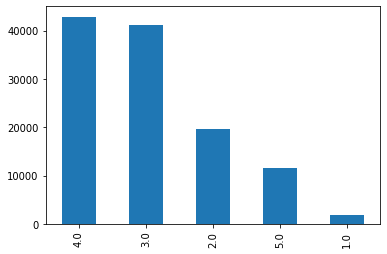

In [ ]:
#treat the missing values in Delivery_review column
df_train_copy['Delivery_Review'].value_counts().plot(kind='bar')

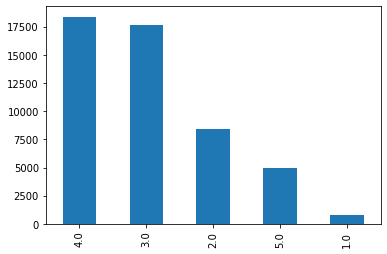

In [ ]:
df_test_copy['Delivery_Review'].value_counts().plot(kind='bar')

In [ ]:
#we can see that both plots have almost same distribution of values.

In [ ]:
#check summary statistics
df_train_copy.describe()['Delivery_Review']

count    117298.000000
mean          3.363843
std           0.928320
min           1.000000
25%           3.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Delivery_Review, dtype: float64

In [ ]:
#the mean and median values are almost same i.e 3

In [ ]:
df_test_copy.describe()['Delivery_Review']

count    50260.000000
mean         3.365718
std          0.927619
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Delivery_Review, dtype: float64

In [ ]:
#same observation recorded for test set

In [ ]:
#Here, we can replace the missing values by the value 3 in both train and test data

In [22]:
df_train_copy['Delivery_Review'] = df_train_copy['Delivery_Review'].replace(np.nan, 3)

In [ ]:
df_train_copy['Delivery_Review'].isnull().sum()

0

In [ ]:
df_train_copy['Delivery_Review'].value_counts()

3.0    50266
4.0    42860
2.0    19732
5.0    11640
1.0     1865
Name: Delivery_Review, dtype: int64

In [23]:
#imputing on test data
df_test_copy['Delivery_Review'] = df_test_copy['Delivery_Review'].replace(np.nan, 3)

In [ ]:
df_test_copy['Delivery_Review'].value_counts()

3.0    21584
4.0    18382
2.0     8391
5.0     4997
1.0      802
Name: Delivery_Review, dtype: int64

In [ ]:
df_test_copy['Delivery_Review'].isnull().sum()

0

In [ ]:
#check missing data in the column session ordered
df_train_copy['Session_Ordered'].value_counts()

2.0    40873
3.0    40440
1.0    40258
Name: Session_Ordered, dtype: int64

In [ ]:
df_train_copy['Session_Ordered'].describe()

count    121571.000000
mean          2.001497
std           0.814737
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: Session_Ordered, dtype: float64

In [24]:
#here mean and median values are same. ie 2. We will impute the missing values with 2
df_train_copy['Session_Ordered'] = df_train_copy['Session_Ordered'].replace(np.nan, 2)

In [ ]:
df_train_copy['Session_Ordered'].isnull().sum()

0

In [ ]:
df_train_copy['Session_Ordered'].value_counts()

2.0    45665
3.0    40440
1.0    40258
Name: Session_Ordered, dtype: int64

In [ ]:
#impute on the test data
df_test_copy['Session_Ordered'].value_counts()

1.0    17626
3.0    17377
2.0    17122
Name: Session_Ordered, dtype: int64

In [ ]:
df_test_copy['Session_Ordered'].describe()

count    52125.000000
mean         1.995223
std          0.819457
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: Session_Ordered, dtype: float64

In [ ]:
#the mean and median values are almost same i.e 2. Impute with 2

In [25]:
df_test_copy['Session_Ordered'] = df_test_copy['Session_Ordered'].replace(np.nan, 2)

In [ ]:
df_test_copy['Session_Ordered'].isnull().sum()

0

In [ ]:
df_test_copy['Session_Ordered'].value_counts()

2.0    19153
1.0    17626
3.0    17377
Name: Session_Ordered, dtype: int64

In [26]:
#check missing values for entire datasets
df_train_copy.isnull().sum()

OrderId               0
Customer_Id           0
Customer_Category     0
Cust_State            0
Zipcode               0
Sales                 0
Order_zone            0
Price                 0
CategoryName          0
Transcation           0
Dept_Id               0
Dept_Name             0
Profit_Ratio          0
Discount              0
Quantity              0
Order_Profit          0
Product_type          0
Prod_Category_Id      0
ProductLength         0
ProductWeight         0
Dispatched            0
Shipping_Class        0
Scheduled_Shipping    0
Warehouse_Region      0
Delivery_Review       0
Session_Ordered       0
WeekdayOrder          0
Delivery_Status       0
dtype: int64

In [27]:
df_test_copy.isnull().sum()

OrderId               0
Customer_Id           0
Customer_Category     0
Cust_State            0
Zipcode               0
Sales                 0
Order_zone            0
Price                 0
CategoryName          0
Transcation           0
Dept_Id               0
Dept_Name             0
Profit_Ratio          0
Discount              0
Quantity              0
Order_Profit          0
Product_type          0
Prod_Category_Id      0
ProductLength         0
ProductWeight         0
Dispatched            0
Shipping_Class        0
Scheduled_Shipping    0
Warehouse_Region      0
Delivery_Review       0
Session_Ordered       0
WeekdayOrder          0
dtype: int64

All the missing values for both train and test sets have been handled by using imputation techniques.

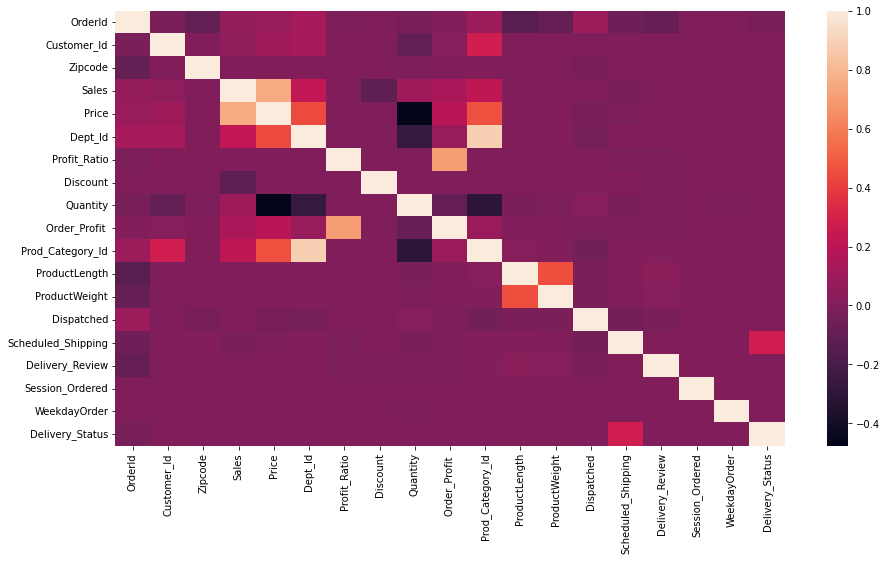

In [29]:
#check correlation matrix for all variables in both datasets using heatmap
plt.figure(figsize=(15,8))
sns.heatmap(data=df_train_copy.corr(), annot=False)
plt.show()

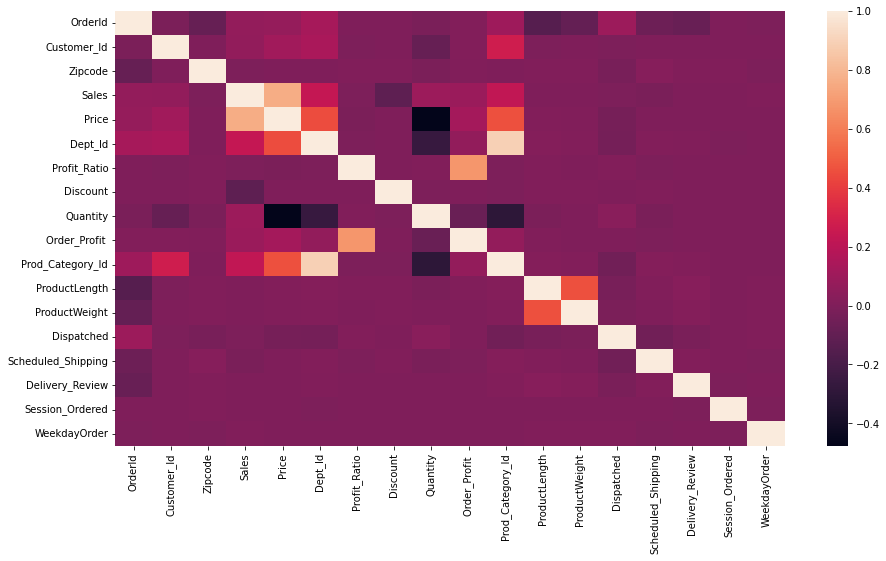

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df_test_copy.corr(), annot=False)
plt.show()

In [ ]:
#there is no significant relationship found between the variables except for some categorical variables like prod_cat-id and dept_id.

Outlier detection and Treatment

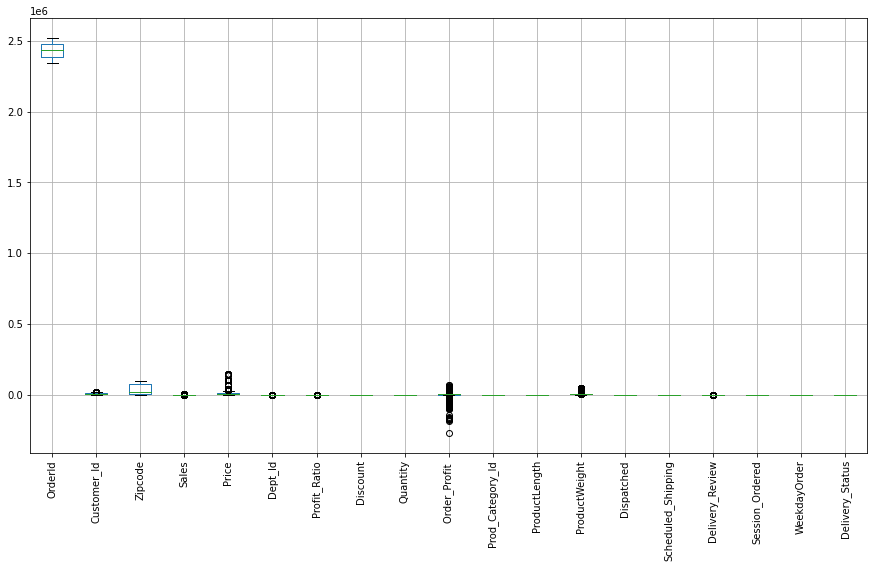

In [ ]:
#for train data
plt.figure(figsize=(15,8))
plt.tight_layout()
df_train_copy.boxplot()
plt.xticks(rotation=90)
plt.show()

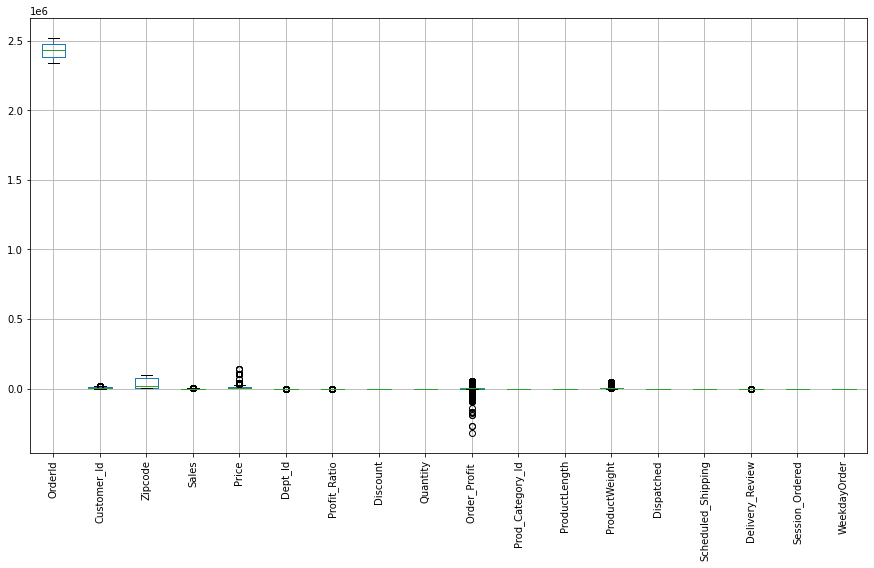

In [ ]:
#for test data
plt.figure(figsize=(15,8))
plt.tight_layout()
df_test_copy.boxplot()
plt.xticks(rotation=90)
plt.show()

We can observe that columns cust_id, sales, price, dept_id, profit_ratio, order_profit, product weight and delivery review have outlier values.

Out of these columns, we can ignore columns cust_id, dept_id and delivery review. Id columns are not required and review column is categorical.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


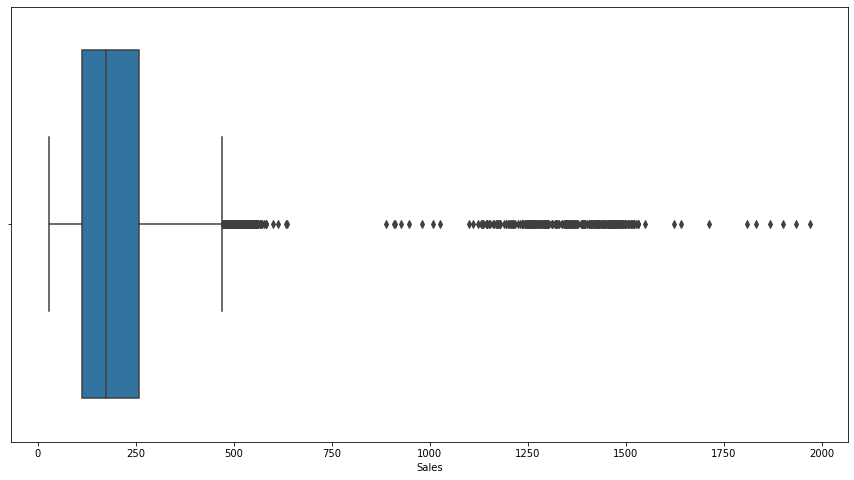

In [ ]:
#Boxplot of sales
plt.figure(figsize=(15,8))
sns.boxplot(df_train_copy['Sales'])
plt.show()

In [ ]:
df_train_copy['Sales'].describe()

count    126363.000000
mean        195.458718
std         119.761379
min          28.000000
25%         114.000000
50%         173.000000
75%         257.000000
max        1969.000000
Name: Sales, dtype: float64

In [ ]:
df_train_copy[df_train_copy['Sales'] > 600].shape[0]

315

In [ ]:
#We can cap the outlier values to the value 600.

In [30]:
#capping the outliers on the train data
df_train_copy['Sales'] = np.where(df_train_copy['Sales'] > 600.0, 600.0, df_train_copy['Sales'])

In [31]:
df_train_copy[df_train_copy['Sales'] > 600].shape[0]

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


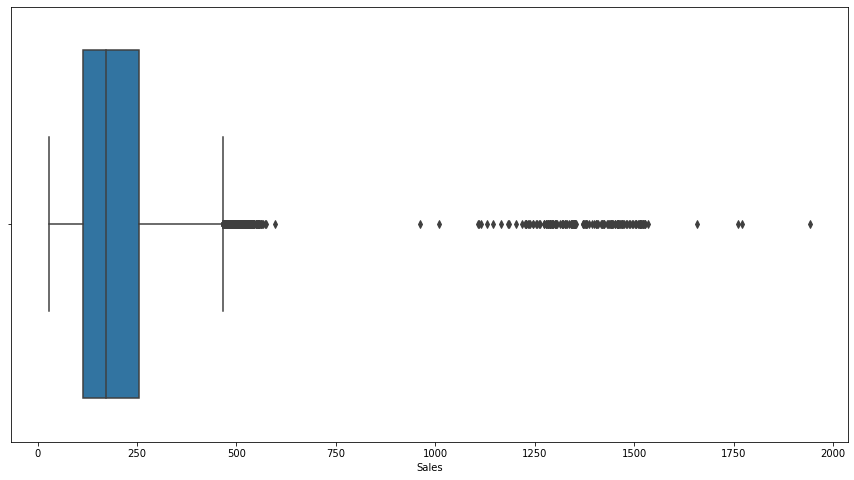

In [ ]:
#Boxplot of sales
plt.figure(figsize=(15,8))
sns.boxplot(df_test_copy['Sales'])
plt.show()

In [32]:
#capping the outliers on the test data
df_test_copy['Sales'] = np.where(df_test_copy['Sales'] > 600.0, 600.0, df_test_copy['Sales'])

In [33]:
df_test_copy[df_test_copy['Sales'] > 600].shape[0]

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


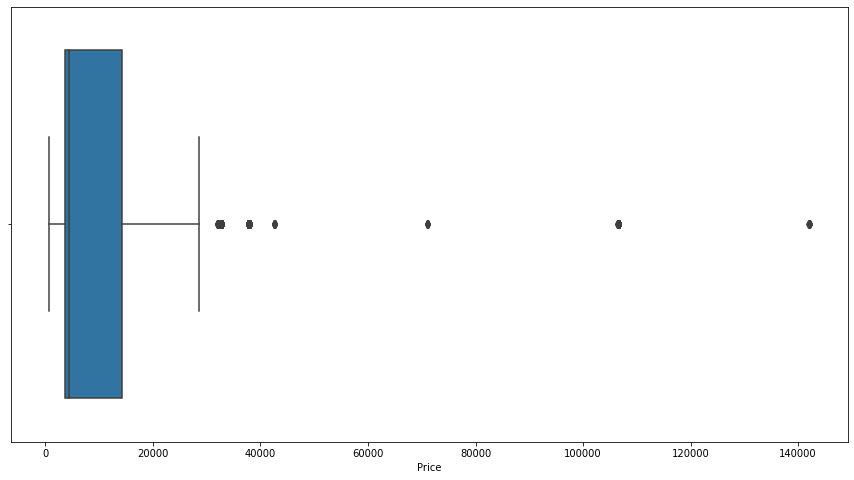

In [ ]:
#outlier detection on price
#Boxplot of price on train data
plt.figure(figsize=(15,8))
sns.boxplot(df_train_copy['Price'])
plt.show()

In [ ]:
#the data is heavily left skewed.

In [ ]:
df_train_copy['Price'].describe()

count    126363.000000
mean      10064.758724
std        9923.788862
min         617.310000
25%        3587.760000
50%        4415.280000
75%       14222.400000
max      142151.340000
Name: Price, dtype: float64

In [ ]:
df_train_copy[df_train_copy['Price'] > 30000].shape[0]

1446

In [34]:
#cap the values to 30000
df_train_copy['Price'] = np.where(df_train_copy['Price'] > 30000.0, 30000.0, df_train_copy['Price'])

In [ ]:
df_train_copy[df_train_copy['Price'] > 30000].shape[0]

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


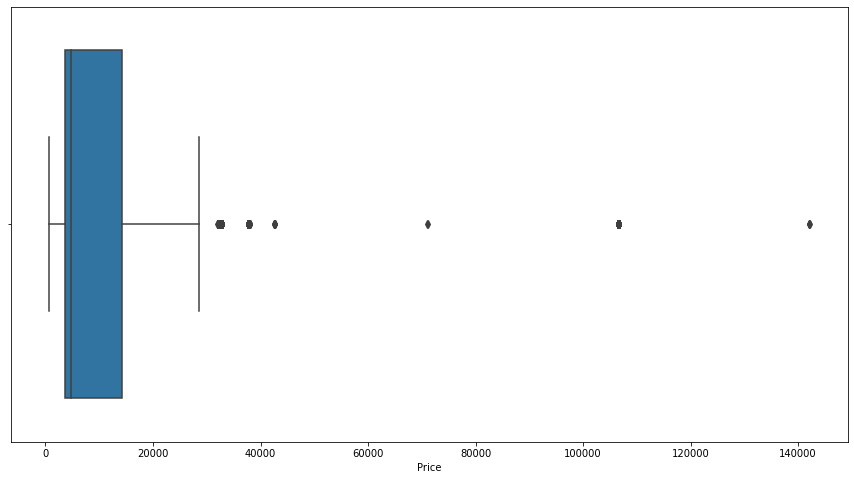

In [ ]:
#check on test set
#Boxplot of price on train data
plt.figure(figsize=(15,8))
sns.boxplot(df_test_copy['Price'])
plt.show()

In [35]:
#carry out same imputation as distribution is similar
df_test_copy['Price'] = np.where(df_test_copy['Price'] > 30000.0, 30000.0, df_test_copy['Price'])

In [36]:
df_test_copy[df_test_copy['Price'] > 30000].shape[0]

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


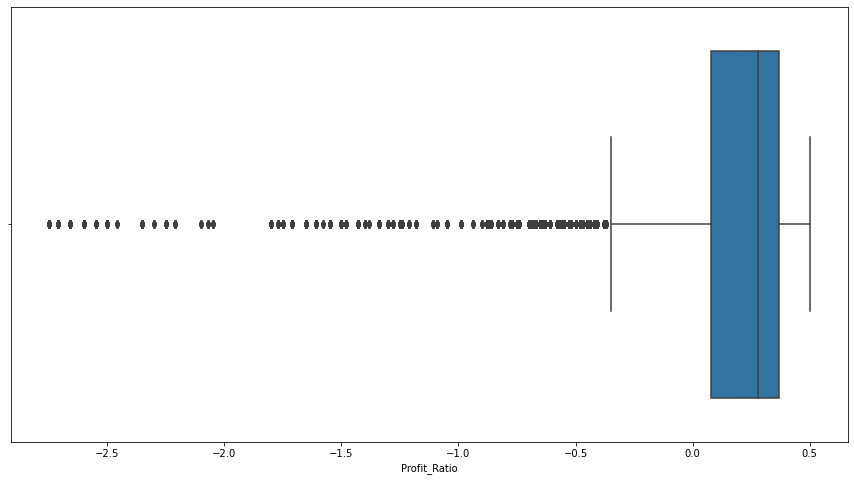

In [ ]:
#profit_ratio
#check boxplot of profit ratio on the train data
plt.figure(figsize=(15,8))
sns.boxplot(df_train_copy['Profit_Ratio'])
plt.show()

In [ ]:
df_train_copy['Profit_Ratio'].describe()

count    126363.000000
mean          0.124273
std           0.467546
min          -2.750000
25%           0.080000
50%           0.280000
75%           0.370000
max           0.500000
Name: Profit_Ratio, dtype: float64

In [ ]:
df_train_copy[df_train_copy['Profit_Ratio'] < -0.5].shape[0]

10972

In [37]:
#capping the values to -0.5
df_train_copy['Profit_Ratio'] = np.where(df_train_copy['Profit_Ratio'] < -0.5, -0.5, df_train_copy['Profit_Ratio'])

In [38]:
df_train_copy[df_train_copy['Profit_Ratio'] < -0.5].shape[0]

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


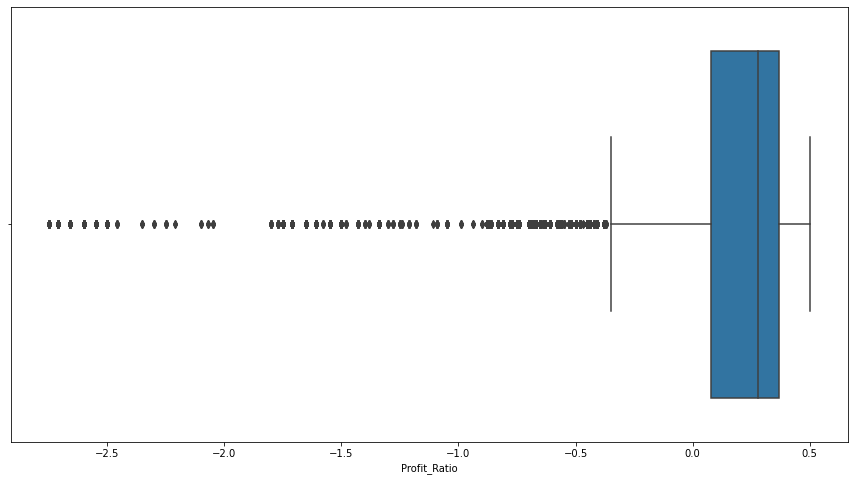

In [ ]:
#check the outlier distribution for profit ratio on test data
plt.figure(figsize=(15,8))
sns.boxplot(df_test_copy['Profit_Ratio'])
plt.show()

In [39]:
#Applying similar capping technique
df_test_copy['Profit_Ratio'] = np.where(df_test_copy['Profit_Ratio'] < -0.5, -0.5, df_test_copy['Profit_Ratio'])

In [ ]:
df_test_copy[df_test_copy['Profit_Ratio'] < -0.5].shape[0]

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


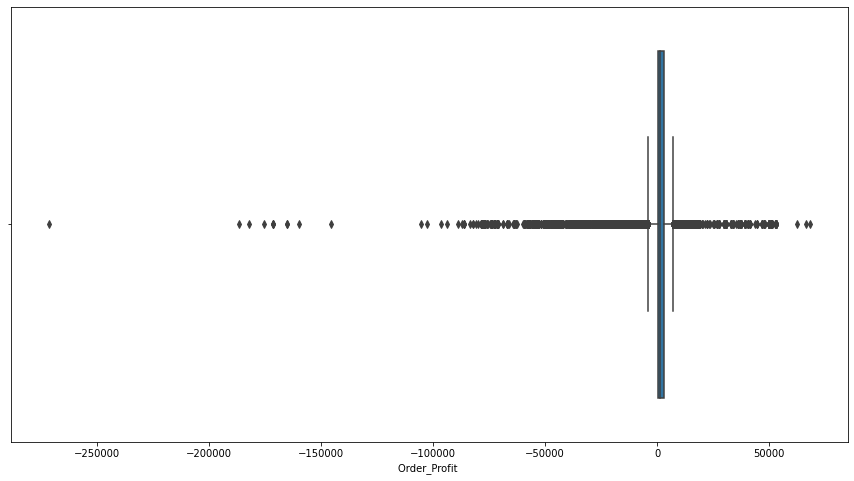

In [ ]:
#order profit column
plt.figure(figsize=(15,8))
sns.boxplot(df_train_copy['Order_Profit '])
plt.show()

In [ ]:
df_train_copy['Order_Profit '].describe()

count    126363.000000
mean       1257.016748
std        6690.787375
min     -271606.420000
25%         314.080000
50%        1258.740000
75%        3119.900000
max       68156.670000
Name: Order_Profit , dtype: float64

In [ ]:
df_train_copy[df_train_copy['Order_Profit '] > 10000].shape[0]

5600

In [ ]:
df_train_copy[df_train_copy['Order_Profit '] < -10000].shape[0]

4129

In [40]:
#capping outlier values to 10000 on both sides
df_train_copy['Order_Profit '] = np.where(df_train_copy['Order_Profit '] > 10000, 10000, df_train_copy['Order_Profit '])

In [ ]:
df_train_copy[df_train_copy['Order_Profit '] > 10000].shape[0]

0

In [41]:
df_train_copy['Order_Profit '] = np.where(df_train_copy['Order_Profit '] < -10000, -10000, df_train_copy['Order_Profit '])

In [ ]:
df_train_copy[df_train_copy['Order_Profit '] < -10000].shape[0]

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


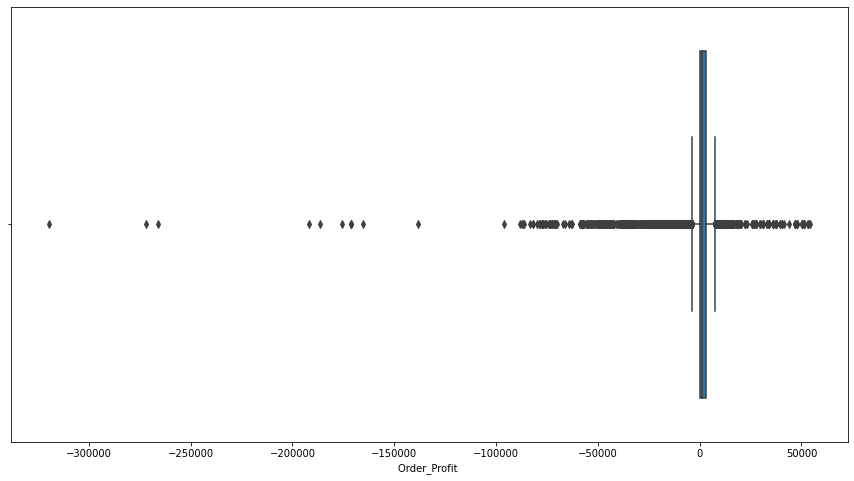

In [ ]:
#check on the test set
plt.figure(figsize=(15,8))
sns.boxplot(df_test_copy['Order_Profit '])
plt.show()

In [ ]:
#similar distribution is observed so same capping technique for outlier values would be applied

In [ ]:
df_test_copy[df_test_copy['Order_Profit '] > 10000].shape[0]

2306

In [ ]:
df_test_copy[df_test_copy['Order_Profit '] < -10000].shape[0]

1792

In [42]:
df_test_copy['Order_Profit '] = np.where(df_test_copy['Order_Profit '] > 10000, 10000, df_test_copy['Order_Profit '])

In [43]:
df_test_copy['Order_Profit '] = np.where(df_test_copy['Order_Profit '] < -10000, -10000, df_test_copy['Order_Profit '])

In [44]:
df_test_copy[df_test_copy['Order_Profit '] > 10000].shape[0]

0

In [45]:
df_test_copy[df_test_copy['Order_Profit '] < -10000].shape[0]

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


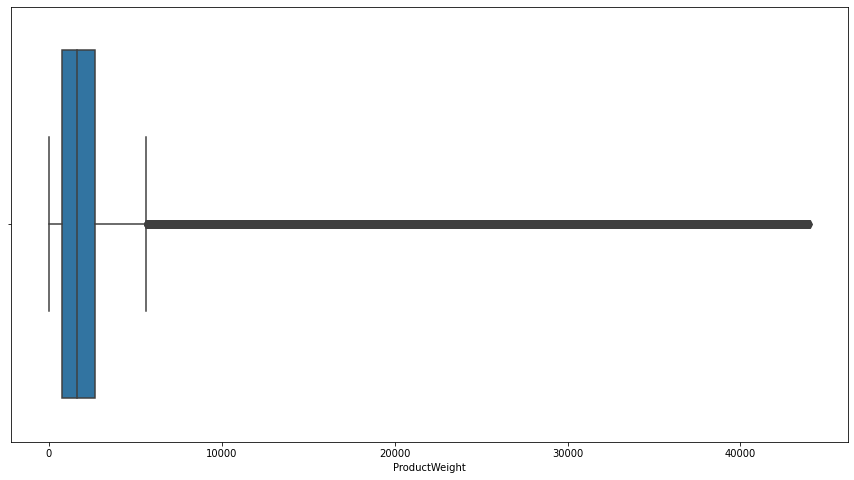

In [ ]:
#product weight
plt.figure(figsize=(15,8))
sns.boxplot(df_train_copy['ProductWeight'])
plt.show()

In [ ]:
df_train_copy['ProductWeight'].describe()

count    126363.000000
mean       3736.038405
std        7600.452160
min          10.000000
25%         764.000000
50%        1640.000000
75%        2706.000000
max       43999.000000
Name: ProductWeight, dtype: float64

In [ ]:
df_train_copy[df_train_copy['ProductWeight'] > 4000].shape[0]

12206

In [46]:
#cap the values to 4000
df_train_copy['ProductWeight'] = np.where(df_train_copy['ProductWeight'] > 4000, 4000, df_train_copy['ProductWeight'])

In [ ]:
df_train_copy[df_train_copy['ProductWeight'] > 4000].shape[0]

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


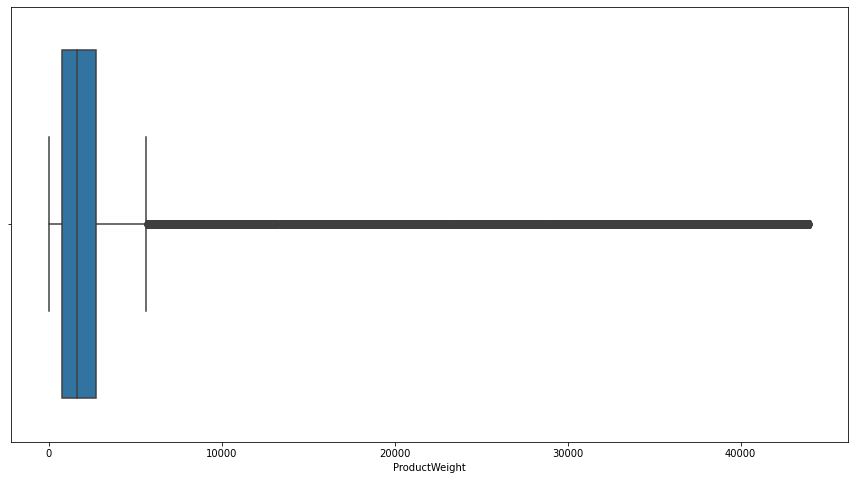

In [ ]:
#check distribution of outlier values on test set
plt.figure(figsize=(15,8))
sns.boxplot(df_test_copy['ProductWeight'])
plt.show()

In [ ]:
#same distribution of values is observed

In [47]:
df_test_copy[df_test_copy['ProductWeight'] > 4000].shape[0]

5268

In [ ]:
df_test_copy['ProductWeight'].describe()

count    54156.000000
mean      3765.868325
std       7639.709880
min         10.000000
25%        786.000000
50%       1654.000000
75%       2725.000000
max      43996.000000
Name: ProductWeight, dtype: float64

In [48]:
df_test_copy['ProductWeight'] = np.where(df_test_copy['ProductWeight'] > 4000, 4000, df_test_copy['ProductWeight'])

In [49]:
df_test_copy[df_test_copy['ProductWeight'] > 4000].shape[0]

0

In [ ]:
#All the outliers have been now taken care of.

In [50]:
#Check distribution of our target variable
df_train_copy['Delivery_Status'].value_counts()
#0 : ontime
#1 : delayed

0    84912
1    41451
Name: Delivery_Status, dtype: int64

The ratio of target classes is approx 2:1. Seems that the target class is not well balanced

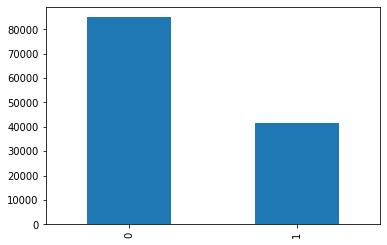

In [ ]:
df_train_copy['Delivery_Status'].value_counts().plot(kind='bar')

In [ ]:
df_train_cat = df_train_copy.select_dtypes(include='object')
df_train_cat.columns

Index(['Customer_Category', 'Cust_State', 'Order_zone', 'CategoryName',
       'Transcation', 'Dept_Name', 'Product_type', 'Shipping_Class',
       'Warehouse_Region'],
      dtype='object')

In [ ]:
#use binary encoding on the categorical columns for feature engineering

In [54]:
encoder = ce.BinaryEncoder(cols=['Customer_Category', 'Cust_State', 'Order_zone', 'CategoryName',
       'Transcation', 'Dept_Name', 'Product_type', 'Shipping_Class',
       'Warehouse_Region'])

In [55]:
df_train_encoded = encoder.fit_transform(df_train_copy)

In [56]:
df_train_encoded.head()

,OrderId,Customer_Id,Customer_Category_0,Customer_Category_1,Cust_State_0,Cust_State_1,Cust_State_2,Cust_State_3,Cust_State_4,Zipcode,Sales,Order_zone_0,Order_zone_1,Order_zone_2,Price,CategoryName_0,CategoryName_1,CategoryName_2,CategoryName_3,CategoryName_4,CategoryName_5,Transcation_0,Transcation_1,Transcation_2,Dept_Id,Dept_Name_0,Dept_Name_1,Dept_Name_2,Dept_Name_3,Profit_Ratio,Discount,Quantity,Order_Profit,Product_type_0,Product_type_1,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Shipping_Class_0,Shipping_Class_1,Shipping_Class_2,Scheduled_Shipping,Warehouse_Region_0,Warehouse_Region_1,Warehouse_Region_2,Delivery_Review,Session_Ordered,WeekdayOrder,Delivery_Status
0,2477882,12386,0,1,0,0,0,0,1,19120,150.0,0,0,1,4383.39,0,0,0,0,0,1,0,0,1,4,0,0,0,1,0.08,0.10,3,352.78,0,1,17,191.0,1592.0,0,0,0,1,4,0,0,1,5.0,2.0,0,0
1,2477895,2630,0,1,0,0,0,1,0,2907,165.0,0,1,0,4295.72,0,0,0,0,0,1,0,0,1,4,0,0,0,1,0.47,0.16,3,2018.10,0,1,17,79.0,1420.0,0,0,0,1,6,0,0,1,2.0,2.0,1,0
2,2473260,1752,1,0,0,0,0,1,1,90214,171.0,0,1,1,3616.65,0,0,0,0,1,0,0,1,0,7,0,0,1,0,0.26,0.07,4,939.63,1,0,46,67.0,1231.0,0,0,0,1,6,0,1,0,4.0,2.0,0,1
3,2466916,9268,0,1,0,0,1,0,0,745,132.0,0,1,0,9175.86,0,0,0,0,1,1,0,1,1,4,0,0,0,1,0.48,0.18,1,4401.74,1,0,18,45.0,1640.0,1,0,1,0,4,0,0,1,4.0,3.0,1,1
4,2351480,2888,1,0,0,0,1,0,0,92427,173.0,1,0,0,2779.29,0,0,0,1,0,0,0,0,1,5,0,0,1,1,0.13,0.16,4,361.70,1,0,29,43.0,1018.0,1,0,0,1,5,0,1,1,2.0,1.0,0,1


In [ ]:
#same on test data

In [ ]:
df_test_copy.select_dtypes(include='object').columns


Index(['Customer_Category', 'Cust_State', 'Order_zone', 'CategoryName',
       'Transcation', 'Dept_Name', 'Product_type', 'Shipping_Class',
       'Warehouse_Region'],
      dtype='object')

In [57]:
test_encoder = ce.BinaryEncoder(cols=['Customer_Category', 'Cust_State', 'Order_zone', 'CategoryName',
       'Transcation', 'Dept_Name', 'Product_type', 'Shipping_Class',
       'Warehouse_Region'])

In [58]:
df_test_encoded = encoder.fit_transform(df_test_copy)

In [59]:
df_test_encoded.head()

,OrderId,Customer_Id,Customer_Category_0,Customer_Category_1,Cust_State_0,Cust_State_1,Cust_State_2,Cust_State_3,Cust_State_4,Zipcode,Sales,Order_zone_0,Order_zone_1,Order_zone_2,Price,CategoryName_0,CategoryName_1,CategoryName_2,CategoryName_3,CategoryName_4,CategoryName_5,Transcation_0,Transcation_1,Transcation_2,Dept_Id,Dept_Name_0,Dept_Name_1,Dept_Name_2,Dept_Name_3,Profit_Ratio,Discount,Quantity,Order_Profit,Product_type_0,Product_type_1,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Shipping_Class_0,Shipping_Class_1,Shipping_Class_2,Scheduled_Shipping,Warehouse_Region_0,Warehouse_Region_1,Warehouse_Region_2,Delivery_Review,Session_Ordered,WeekdayOrder
0,2372881,2989,0,1,0,0,0,0,1,735,173.0,0,0,1,2833.08,0,0,0,0,0,1,0,0,1,5,0,0,0,1,-0.50,0.07,5,-1920.91,0,1,29,25.0,1720.0,0,0,0,1,6,0,0,1,5.0,2.0,1
1,2445349,5359,1,0,0,0,0,1,0,737,222.0,0,1,0,14133.42,0,0,0,0,1,0,0,1,0,7,0,0,1,0,0.08,0.06,1,1132.14,0,1,48,29.0,964.0,1,0,0,1,4,0,1,0,3.0,3.0,0
2,2441537,4111,1,1,0,0,0,1,1,91350,149.0,0,1,1,3545.31,0,0,0,0,1,1,0,1,1,7,0,0,1,0,0.34,0.06,3,1204.39,0,1,46,121.0,2994.0,0,0,0,1,6,0,1,1,3.0,1.0,1
3,2461867,5377,1,0,0,0,1,0,0,77860,162.0,1,0,0,9234.05,0,0,0,1,0,0,0,0,1,4,0,0,1,1,0.39,0.03,1,3600.48,1,0,18,156.0,1008.0,0,0,0,1,5,0,1,0,3.0,3.0,1
4,2461659,10563,1,0,0,0,1,0,1,47922,115.0,1,0,0,9174.76,0,0,0,1,0,0,0,0,1,4,0,0,1,1,0.50,0.06,1,4586.33,0,1,18,114.0,1354.0,0,0,0,1,2,1,0,0,3.0,2.0,1


In [ ]:
df_test_copy.head()

,OrderId,Customer_Id,Customer_Category,Cust_State,Zipcode,Sales,Order_zone,Price,CategoryName,Transcation,Dept_Id,Dept_Name,Profit_Ratio,Discount,Quantity,Order_Profit,Product_type,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Shipping_Class,Scheduled_Shipping,Warehouse_Region,Delivery_Review,Session_Ordered,WeekdayOrder
0,2372881,2989,others,HR,735,173.0,West,2833.08,Cat-3,UPI,5,Golf,-0.50,0.07,5,-1920.91,Fragile,29,25.0,1720.0,0,Standard,6,NORTH,5.0,2.0,1
1,2445349,5359,Consumer,MA,737,222.0,Central,14133.42,Cat-49,Debit,7,Fan Shop,0.08,0.06,1,1132.14,Fragile,48,29.0,964.0,1,Standard,4,CENTRAL,3.0,3.0,0
2,2441537,4111,Corporate,GJ,91350,149.0,East,3545.31,Cat-50,Credit,7,Fan Shop,0.34,0.06,3,1204.39,Fragile,46,121.0,2994.0,0,Standard,6,WEST,3.0,1.0,1
3,2461867,5377,Consumer,RJ,77860,162.0,North,9234.05,Cat-12,UPI,4,Apparel,0.39,0.03,1,3600.48,Not Fragile,18,156.0,1008.0,0,Standard,5,CENTRAL,3.0,3.0,1
4,2461659,10563,Consumer,WB,47922,115.0,North,9174.76,Cat-12,UPI,4,Apparel,0.50,0.06,1,4586.33,Fragile,18,114.0,1354.0,0,Standard,2,NE,3.0,2.0,1


In [ ]:
#We have done the encoding using binary encoding technique on both the train and test data

We would use the df_train_encoded and df_test_encoded for further use

Model building

In [ ]:
df_train_encoded.columns

Index(['OrderId', 'Customer_Id', 'Customer_Category_0', 'Customer_Category_1',
       'Customer_Category_2', 'Cust_State_0', 'Cust_State_1', 'Cust_State_2',
       'Cust_State_3', 'Cust_State_4', 'Cust_State_5', 'Zipcode', 'Sales',
       'Order_zone_0', 'Order_zone_1', 'Order_zone_2', 'Order_zone_3', 'Price',
       'CategoryName_0', 'CategoryName_1', 'CategoryName_2', 'CategoryName_3',
       'CategoryName_4', 'CategoryName_5', 'CategoryName_6', 'Transcation_0',
       'Transcation_1', 'Transcation_2', 'Dept_Id', 'Dept_Name_0',
       'Dept_Name_1', 'Dept_Name_2', 'Dept_Name_3', 'Dept_Name_4',
       'Profit_Ratio', 'Discount', 'Quantity', 'Order_Profit ',
       'Product_type_0', 'Product_type_1', 'Prod_Category_Id', 'ProductLength',
       'ProductWeight', 'Dispatched', 'Shipping_Class_0', 'Shipping_Class_1',
       'Shipping_Class_2', 'Scheduled_Shipping', 'Warehouse_Region_0',
       'Warehouse_Region_1', 'Warehouse_Region_2', 'Warehouse_Region_3',
       'Delivery_Review', 'Sess

In [60]:
X = df_train_encoded.drop('Delivery_Status', axis=1)
X.columns

Index(['OrderId', 'Customer_Id', 'Customer_Category_0', 'Customer_Category_1',
       'Cust_State_0', 'Cust_State_1', 'Cust_State_2', 'Cust_State_3',
       'Cust_State_4', 'Zipcode', 'Sales', 'Order_zone_0', 'Order_zone_1',
       'Order_zone_2', 'Price', 'CategoryName_0', 'CategoryName_1',
       'CategoryName_2', 'CategoryName_3', 'CategoryName_4', 'CategoryName_5',
       'Transcation_0', 'Transcation_1', 'Transcation_2', 'Dept_Id',
       'Dept_Name_0', 'Dept_Name_1', 'Dept_Name_2', 'Dept_Name_3',
       'Profit_Ratio', 'Discount', 'Quantity', 'Order_Profit ',
       'Product_type_0', 'Product_type_1', 'Prod_Category_Id', 'ProductLength',
       'ProductWeight', 'Dispatched', 'Shipping_Class_0', 'Shipping_Class_1',
       'Shipping_Class_2', 'Scheduled_Shipping', 'Warehouse_Region_0',
       'Warehouse_Region_1', 'Warehouse_Region_2', 'Delivery_Review',
       'Session_Ordered', 'WeekdayOrder'],
      dtype='object')

In [61]:
y = df_train_encoded['Delivery_Status']
y

0         0
1         0
2         1
3         1
4         1
         ..
126358    0
126359    0
126360    0
126361    1
126362    0
Name: Delivery_Status, Length: 126363, dtype: int64

In [62]:
#train test split on train data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(101090, 49)
(25273, 49)
(101090,)
(25273,)


In [65]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 50))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=50, n_jobs=None,
                                                 oob_score=False,


In [66]:
selected_feat= X_train.columns[(sel.get_support())]
print(selected_feat)

Index(['OrderId', 'Customer_Id', 'Zipcode', 'Sales', 'Price', 'Profit_Ratio',
       'Discount', 'Order_Profit ', 'ProductLength', 'ProductWeight',
       'Shipping_Class_0', 'Shipping_Class_1', 'Shipping_Class_2',
       'Scheduled_Shipping'],
      dtype='object')


In [69]:
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

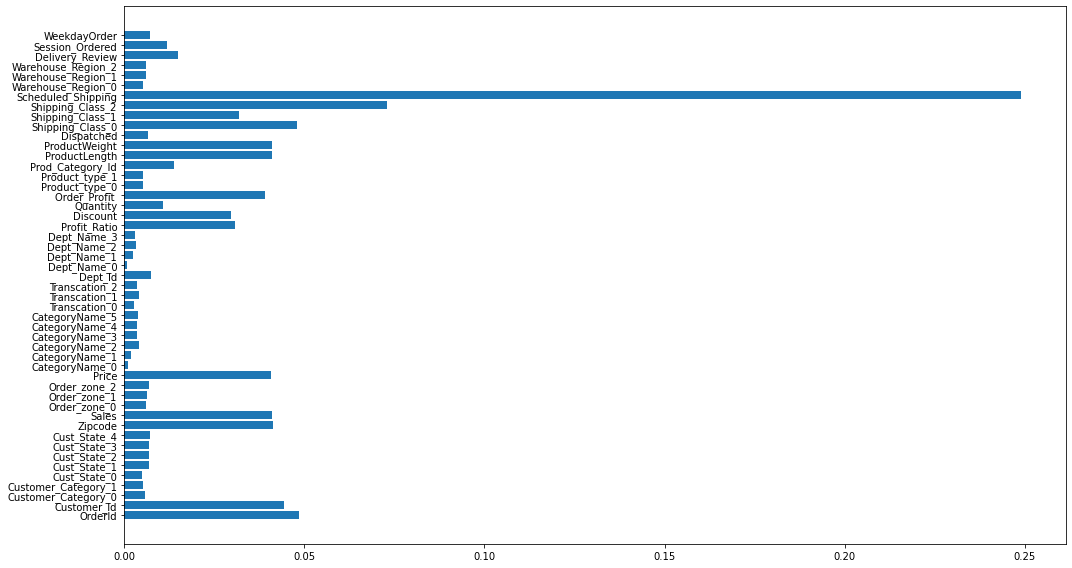

In [70]:
plt.figure(figsize=(15,8))
plt.barh(X_train.columns, rfc.feature_importances_)
plt.tight_layout()
plt.show()

In [73]:
#selecting the best features as per rfc feat importances
new_X = df_train_encoded[['Sales', 'Price', 'Shipping_Class_0', 'Zipcode','Order_Profit ', 'ProductLength', 'ProductWeight','Shipping_Class_2',
                          'Scheduled_Shipping']]

In [74]:
new_X.head()

,Sales,Price,Shipping_Class_0,Zipcode,Order_Profit,ProductLength,ProductWeight,Shipping_Class_2,Scheduled_Shipping
0,150.0,4383.39,0,19120,352.78,191.0,1592.0,1,4
1,165.0,4295.72,0,2907,2018.10,79.0,1420.0,1,6
2,171.0,3616.65,0,90214,939.63,67.0,1231.0,1,6
3,132.0,9175.86,0,745,4401.74,45.0,1640.0,0,4
4,173.0,2779.29,0,92427,361.70,43.0,1018.0,1,5


In [75]:
df_test_copy = df_test_encoded[['Sales', 'Price', 'Shipping_Class_0', 'Zipcode','Order_Profit ', 'ProductLength', 'ProductWeight','Shipping_Class_2',
                          'Scheduled_Shipping']]

In [76]:
df_test_copy.head()

,Sales,Price,Shipping_Class_0,Zipcode,Order_Profit,ProductLength,ProductWeight,Shipping_Class_2,Scheduled_Shipping
0,173.0,2833.08,0,735,-1920.91,25.0,1720.0,1,6
1,222.0,14133.42,0,737,1132.14,29.0,964.0,1,4
2,149.0,3545.31,0,91350,1204.39,121.0,2994.0,1,6
3,162.0,9234.05,0,77860,3600.48,156.0,1008.0,1,5
4,115.0,9174.76,0,47922,4586.33,114.0,1354.0,1,2


In [77]:
#again do the train test split for best features
X_train, X_val, y_train, y_val = train_test_split(new_X, y, test_size=0.2, random_state=42)

In [ ]:
y

0         0
1         0
2         1
3         1
4         1
         ..
126358    0
126359    0
126360    0
126361    1
126362    0
Name: Delivery_Status, Length: 126363, dtype: int64

In [78]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(101090, 9)
(25273, 9)
(101090,)
(25273,)


In [ ]:
#use RFC to get the results on train data

In [106]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=10, class_weight='balanced', random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=89, verbose=0,
                       warm_start=False)

In [107]:
y_pred_train_rfc = rfc.predict(X_train)

In [108]:
print(confusion_matrix(y_train, y_pred_train_rfc))

[[42733 25088]
 [ 1475 31794]]


In [109]:
print(classification_report(y_train, y_pred_train_rfc))

              precision    recall  f1-score   support

           0       0.97      0.63      0.76     67821
           1       0.56      0.96      0.71     33269

    accuracy                           0.74    101090
   macro avg       0.76      0.79      0.73    101090
weighted avg       0.83      0.74      0.74    101090



In [110]:
y_pred_val_rfc = rfc.predict(X_val)

In [111]:
print(confusion_matrix(y_val, y_pred_val_rfc))

[[10815  6276]
 [  386  7796]]


In [112]:
#print the f1 score
print(f1_score(y_val, y_pred_val_rfc))

0.7006380875348251


In [113]:
print(classification_report(y_val, y_pred_val_rfc))

              precision    recall  f1-score   support

           0       0.97      0.63      0.76     17091
           1       0.55      0.95      0.70      8182

    accuracy                           0.74     25273
   macro avg       0.76      0.79      0.73     25273
weighted avg       0.83      0.74      0.74     25273



In [114]:
#define the paramaters for rfc
params = {'criterion': ['gini','entropy'], 'max_depth': range(0,21), 'n_estimators': range(0,101), 'class_weight':['balanced', 'balanced_subsample']}

In [97]:
#use randomized search cv for parameter tuning
from sklearn.model_selection import KFold, RandomizedSearchCV, GridSearchCV

In [115]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)

In [116]:
rscv = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), 
                          param_distributions=params, n_iter=5, scoring='f1', n_jobs=-1, cv=kf, verbose=3, random_state=42)

In [117]:
rscv.fit(X_train, y_train)
rscv_tuned_rf = rscv.best_estimator_
print(rscv_tuned_rf)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.8min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=99, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)


In [118]:
scores = cross_val_score(rscv_tuned_rf, X_train, y_train, cv = kf, scoring = 'f1', n_jobs = -1)
print("RFC model tuned f1 scores: ", scores)
print("RFC model Bias Error: ", 1 - np.mean(scores))
print("RFC model Variance Error: ", np.std(scores, ddof = 1))

RFC model tuned f1 scores:  [0.70184378 0.70513075 0.70857257]
RFC model Bias Error:  0.29481763356843205
RFC model Variance Error:  0.003364689448343045


In [119]:
y_pred_val_rfc = rscv_tuned_rf.predict(X_val)

In [120]:
print(f1_score(y_val, y_pred_val_rfc))

0.7006066052572455


In [121]:
#lets get our predictions using xgboost classifier
xgb = XGBClassifier(random_state=42)

In [122]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [123]:
y_pred_train_xgb = xgb.predict(X_train)

In [124]:
print(confusion_matrix(y_train, y_pred_train_xgb))

print(classification_report(y_train, y_pred_train_xgb))

[[47451 20370]
 [ 5987 27282]]
              precision    recall  f1-score   support

           0       0.89      0.70      0.78     67821
           1       0.57      0.82      0.67     33269

    accuracy                           0.74    101090
   macro avg       0.73      0.76      0.73    101090
weighted avg       0.78      0.74      0.75    101090



In [125]:
y_pred_val_xgb = xgb.predict(X_val)

In [126]:
print(confusion_matrix(y_val, y_pred_val_xgb))

print(classification_report(y_val, y_pred_val_xgb))

[[12046  5045]
 [ 1519  6663]]
              precision    recall  f1-score   support

           0       0.89      0.70      0.79     17091
           1       0.57      0.81      0.67      8182

    accuracy                           0.74     25273
   macro avg       0.73      0.76      0.73     25273
weighted avg       0.78      0.74      0.75     25273



In [127]:
print(f1_score(y_val, y_pred_val_xgb))

0.6699849170437406


In [ ]:
#Xgboost hyperparmeter tuning with rscv

In [129]:
params = {'max_depth':range(0,51), 'learning_rate':[0.01,0.05,0.1,0.5], 'n_estimators':range(0,101)}

rscv_xg = RandomizedSearchCV(estimator=XGBClassifier(random_state=42), param_distributions=params, n_iter=5, scoring='f1', n_jobs=-1, cv=kf, 
                             verbose=3, random_state=42)
rscv_xg.fit(X_train, y_train)
rscv_tuned_xg = rscv_xg.best_estimator_
print(rscv_tuned_xg)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.3min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=52, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [130]:
scores = cross_val_score(rscv_tuned_xg, X_train, y_train, cv = kf, scoring = 'f1', n_jobs = -1)
print("XGB model tuned f1 scores: ", scores)
print("XGB model Bias Error: ", 1 - np.mean(scores))
print("XGB model Variance Error: ", np.std(scores, ddof = 1))

XGB model tuned f1 scores:  [0.68782051 0.68508841 0.68882979]
XGB model Bias Error:  0.3127537632982059
XGB model Variance Error:  0.0019356705820386675


In [131]:
y_pred_train_xgb = rscv_tuned_xg.predict(X_val)

In [132]:
print(confusion_matrix(y_val, y_pred_val_xgb))

print(classification_report(y_val, y_pred_val_xgb))

[[12046  5045]
 [ 1519  6663]]
              precision    recall  f1-score   support

           0       0.89      0.70      0.79     17091
           1       0.57      0.81      0.67      8182

    accuracy                           0.74     25273
   macro avg       0.73      0.76      0.73     25273
weighted avg       0.78      0.74      0.75     25273



In [133]:
#Adaboost model
ab = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=50, random_state=42, max_depth=10, class_weight='balanced'), 
                        n_estimators=50, learning_rate=0.1, random_state=42)

In [134]:
ab.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=10,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                   

In [135]:
y_pred_train_ab = ab.predict(X_train)

In [136]:
print(confusion_matrix(y_train, y_pred_train_ab))

print(classification_report(y_train, y_pred_train_ab))

[[43195 24626]
 [ 1466 31803]]
              precision    recall  f1-score   support

           0       0.97      0.64      0.77     67821
           1       0.56      0.96      0.71     33269

    accuracy                           0.74    101090
   macro avg       0.77      0.80      0.74    101090
weighted avg       0.83      0.74      0.75    101090



In [137]:
y_pred_val_ab = ab.predict(X_val)

In [138]:
print(f1_score(y_val, y_pred_val_ab))

0.7002833880617156


In [139]:
print(confusion_matrix(y_val, y_pred_val_ab))

print(classification_report(y_val, y_pred_val_ab))

[[10826  6265]
 [  398  7784]]
              precision    recall  f1-score   support

           0       0.96      0.63      0.76     17091
           1       0.55      0.95      0.70      8182

    accuracy                           0.74     25273
   macro avg       0.76      0.79      0.73     25273
weighted avg       0.83      0.74      0.74     25273



In [140]:
import lightgbm
from lightgbm import LGBMClassifier

In [141]:
lgbm = LGBMClassifier(max_depth=7, n_estimators=87, class_weight='balanced', random_state=42, n_jobs=-1)

In [142]:
lgbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=7, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=87, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [143]:
y_pred_train_lgbm = lgbm.predict(X_train)

In [144]:
print(confusion_matrix(y_train, y_pred_train_lgbm))

print(classification_report(y_train, y_pred_train_lgbm))

[[42789 25032]
 [ 1473 31796]]
              precision    recall  f1-score   support

           0       0.97      0.63      0.76     67821
           1       0.56      0.96      0.71     33269

    accuracy                           0.74    101090
   macro avg       0.76      0.79      0.73    101090
weighted avg       0.83      0.74      0.74    101090



In [145]:
y_pred_val_lgbm = lgbm.predict(X_val)

In [146]:
print(f1_score(y_val, y_pred_val_lgbm))

0.7004181466660672


In [ ]:
#install catboost

In [148]:
pip install catboost

     |████████████████████████████████| 76.4 MB 25 kB/s 


In [149]:
from catboost import CatBoostClassifier

In [150]:
catboost = CatBoostClassifier(iterations=7, learning_rate=0.1, depth=8)

In [152]:
catboost.fit(X_train, y_train)

0:	learn: 0.6558554	total: 73.8ms	remaining: 443ms
1:	learn: 0.6254060	total: 89.6ms	remaining: 224ms
2:	learn: 0.6000703	total: 103ms	remaining: 138ms
3:	learn: 0.5787411	total: 124ms	remaining: 92.7ms
4:	learn: 0.5607834	total: 145ms	remaining: 58ms
5:	learn: 0.5452361	total: 167ms	remaining: 27.8ms
6:	learn: 0.5320000	total: 191ms	remaining: 0us


In [153]:
y_pred_train_cat = catboost.predict(X_train)

In [154]:
print(confusion_matrix(y_train, y_pred_train_cat))

print(classification_report(y_train, y_pred_train_cat))

[[46908 20913]
 [ 5297 27972]]
              precision    recall  f1-score   support

           0       0.90      0.69      0.78     67821
           1       0.57      0.84      0.68     33269

    accuracy                           0.74    101090
   macro avg       0.74      0.77      0.73    101090
weighted avg       0.79      0.74      0.75    101090



In [ ]:
#get predictions on the test set
final_predictions_ab = rfc.predict(df_test_copy)

In [ ]:
#get order_id for test data
test_file_ids = df_test['OrderId']
test_file_ids

0        2372881
1        2445349
2        2441537
3        2461867
4        2461659
          ...   
54151    2514090
54152    2495221
54153    2431788
54154    2385761
54155    2363843
Name: OrderId, Length: 54156, dtype: int64

In [ ]:
#create submission df
submission_rfc=pd.DataFrame([test_file_ids,final_predictions_ab]).T
submission_rfc.head()

,OrderId,Unnamed 0
0,2372881,1
1,2445349,0
2,2441537,1
3,2461867,1
4,2461659,0


In [ ]:
submission_rfc.rename(columns={"Unnamed 0": "Delivery_Status"}, inplace=True)
submission_rfc.head()

,OrderId,Delivery_Status
0,2372881,1
1,2445349,0
2,2441537,1
3,2461867,1
4,2461659,0


In [ ]:
submission_rfc.shape

(54156, 2)

In [ ]:
#from google.colab import files
#drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
submission_rfc.to_csv('submission_rfc.csv',index = False)

In [ ]:
from google.colab import files
files.download("submission_rfc.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>